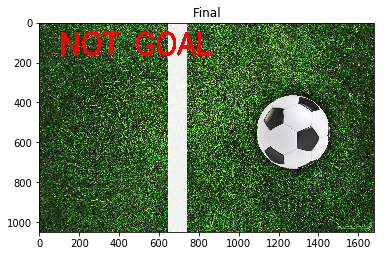

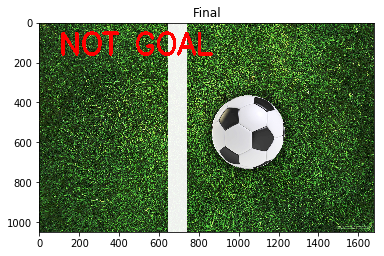

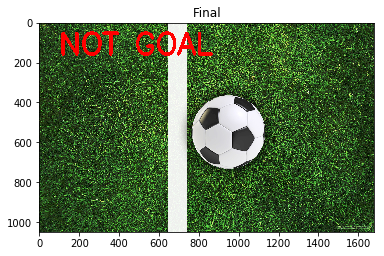

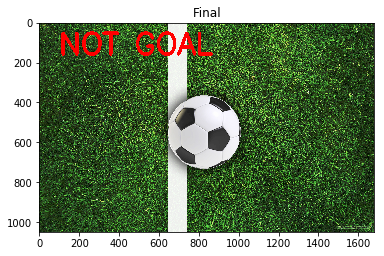

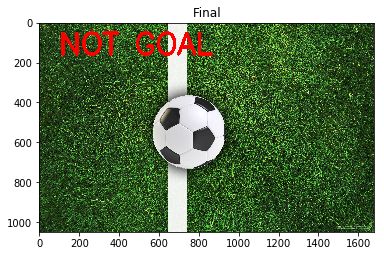

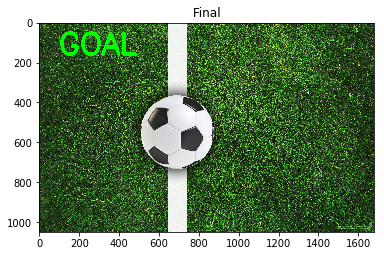

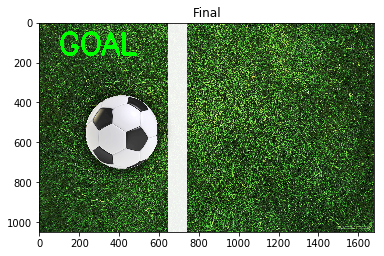

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    blured = cv2.blur(threshold, (3, 3), 0)
#     plot(image, 'Image')
#     plot(gray, 'Grayscale')
#     plot(threshold, 'Threshold')
#     plot(blured, 'Blured')
    return blured

def plot(image, title):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    if len(image.shape) == 2: 
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    
def get_centroid_position(cnt):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    return cx, cy
    
def goal_or_not(image):  
    original_image = image.copy()
    image = preprocess_image(image)
    _, contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    ball = contours[0]
    goal_line = contours[1]
    ball_center = get_centroid_position(ball)
    goal_line_center = get_centroid_position(goal_line)
    # cv2.drawContours(original_image, [ball, goal_line], -1, (255,0,0), 7)
    # plot(original_image, 'Contours')
    # cv2.circle(original_image, ball_center, 15, (0, 0, 255), -1)
    # cv2.circle(original_image, goal_line_center, 15, (0, 0, 255), -1)
    # plot(original_image, 'Centroid Positions')
    if ball_center[0] <= goal_line_center[0]:
        result = 'GOAL'
        color = (0,255,0)
    else:
        result = 'NOT GOAL'
        color = (0,0,255)
    cv2.putText(original_image, result, (100, 160), cv2.FONT_HERSHEY_SIMPLEX, 5, color, 15)
    plot(original_image, 'Final')

    
    
for i in range(7):  
    image = cv2.imread('../Data/Images/goal' + str(i) + '.jpg')
    goal_or_not(image)
    


cv2.destroyAllWindows()